In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
loan_data = pd.read_csv('E:\IMPORTANT DOCUMENTS\Projects\Automated Loan Approval System\Data/loan-train.csv')

In [6]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
print(loan_data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


FINDING MISSING VALUES  

In [9]:
missing_values = loan_data.isnull().sum()

In [10]:
print(missing_values)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [11]:
loan_data['Gender'].fillna('Male', inplace=True)

In [12]:
loan_data['Married'].fillna('No',inplace=True)

In [13]:
loan_data["Dependents"].fillna('0', inplace=True)

In [14]:
loan_data['Self_Employed'].fillna('No', inplace=True)

In [15]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)

In [16]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean(), inplace=True)

In [17]:
loan_data['Credit_History'].fillna(0, inplace=True)

All the missing values handled successfuily

Remove duplicates

In [18]:
loan_data.drop_duplicates(inplace=True)


Analyze the target variable

Printing the unique values of 

In [19]:
print(loan_data['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\2310638995.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x='Loan_Status', palette='pastel')


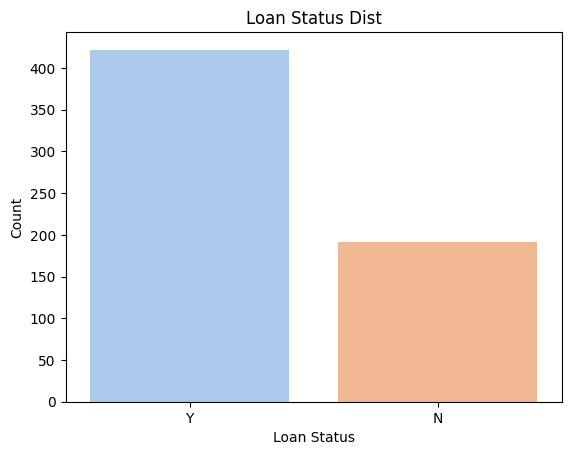

In [20]:
sns.countplot(data=loan_data, x='Loan_Status', palette='pastel')
plt.title("Loan Status Dist")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

Check for categorical variables

In [21]:
cat_col = loan_data.select_dtypes(include=['object', 'category']).columns

In [22]:
print(cat_col)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [23]:
for col in cat_col:
    print(f"Unique values in {col}:")
    print(loan_data[col].unique())
    print()

Unique values in Loan_ID:
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'L

In [24]:
for col in cat_col:
    print(f"Value Counts for {col}:")
    print(loan_data[col].value_counts())
    print()

Value Counts for Loan_ID:
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Value Counts for Gender:
Male      502
Female    112
Name: Gender, dtype: int64

Value Counts for Married:
Yes    398
No     216
Name: Married, dtype: int64

Value Counts for Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Value Counts for Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Value Counts for Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64

Value Counts for Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Value Counts for Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64



Checking dist of Categorical Col

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\4057610582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=col, palette='pastel')


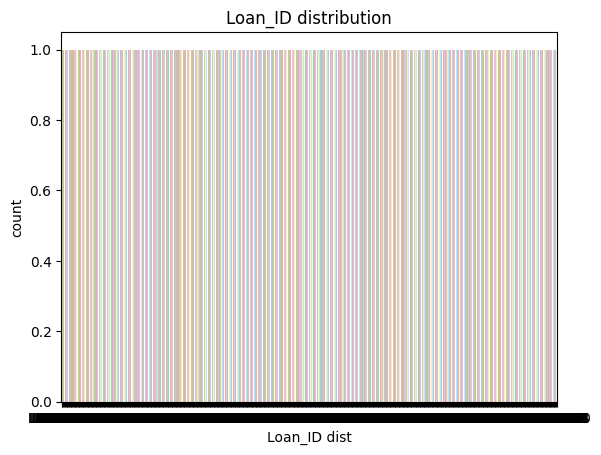

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\4057610582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=col, palette='pastel')


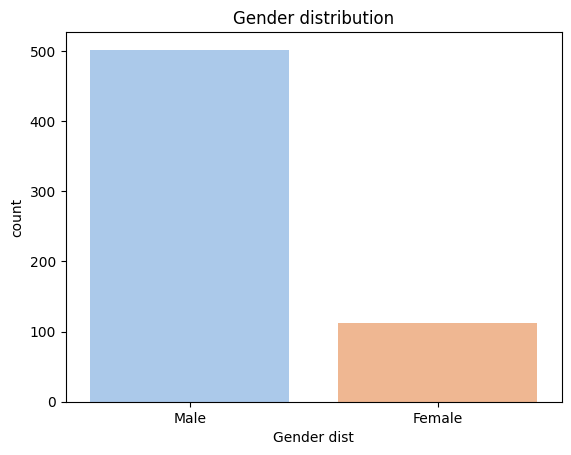

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\4057610582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=col, palette='pastel')


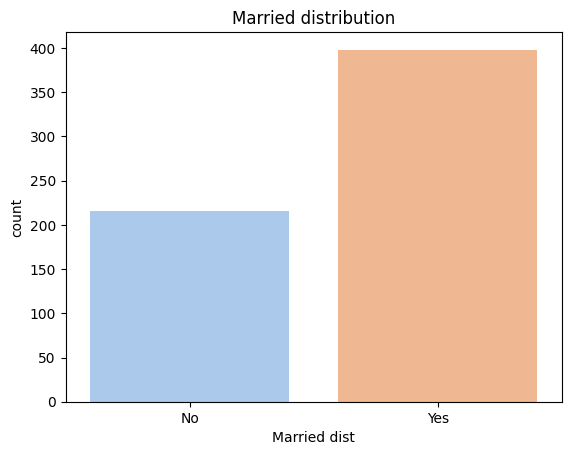

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\4057610582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=col, palette='pastel')


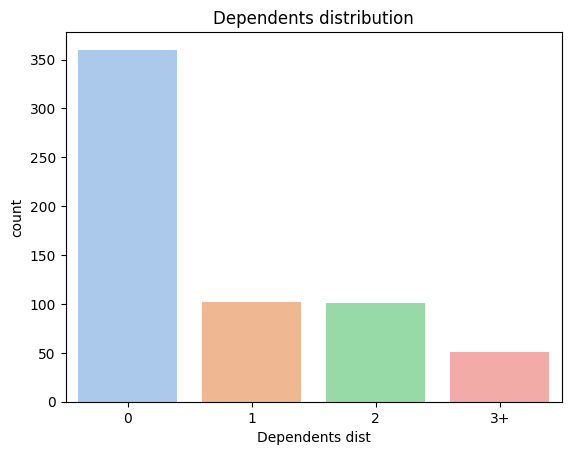

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\4057610582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=col, palette='pastel')


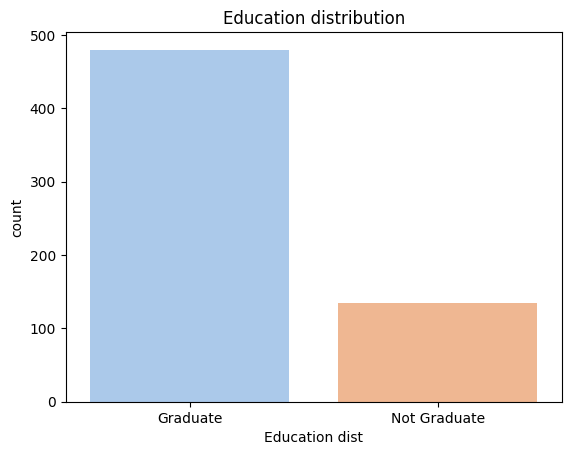

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\4057610582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=col, palette='pastel')


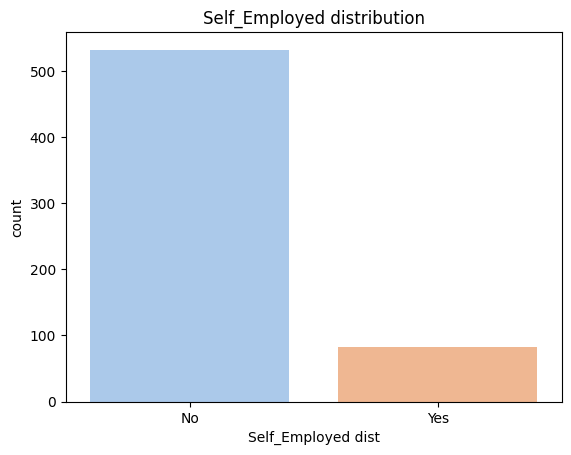

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\4057610582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=col, palette='pastel')


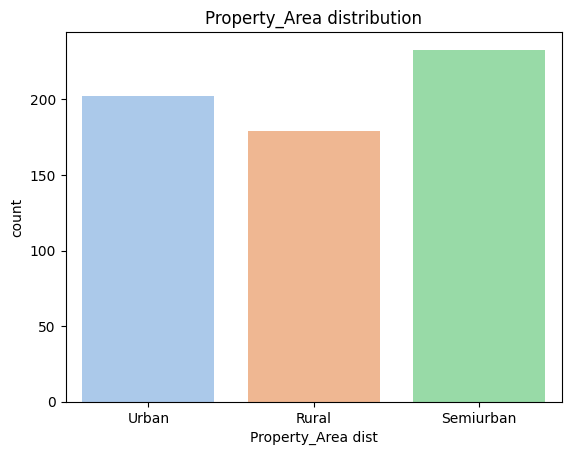

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\4057610582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=col, palette='pastel')


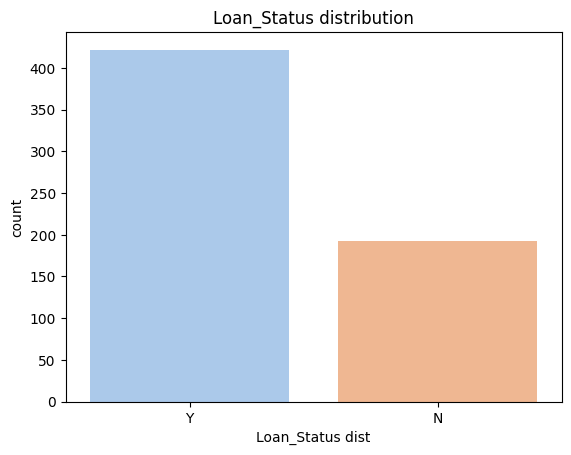

In [25]:
for col in cat_col:
    sns.countplot(data=loan_data, x=col, palette='pastel')
    plt.title(f"{col} distribution")
    plt.xlabel(f"{col} dist")
    plt.ylabel("count")
    plt.show()

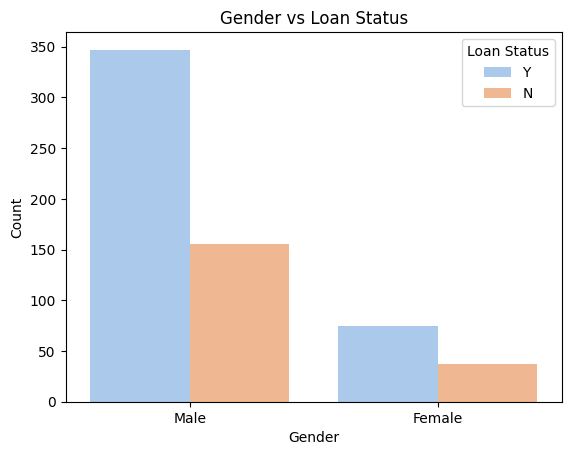

In [26]:
sns.countplot(data=loan_data, x='Gender', hue='Loan_Status', palette='pastel')
plt.title("Gender vs Loan Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


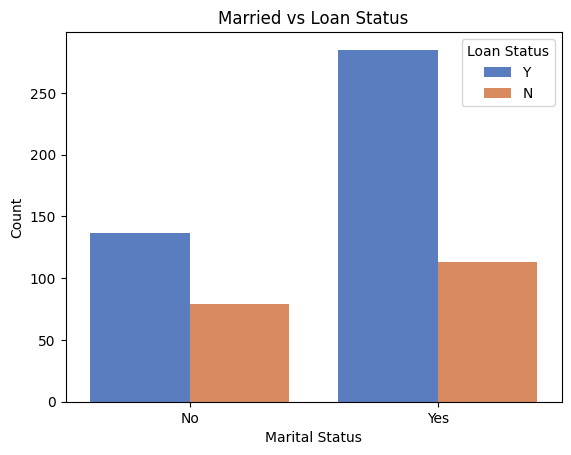

In [27]:
# Married vs Loan_Status
sns.countplot(data=loan_data, x='Married', hue='Loan_Status', palette='muted')
plt.title("Married vs Loan Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


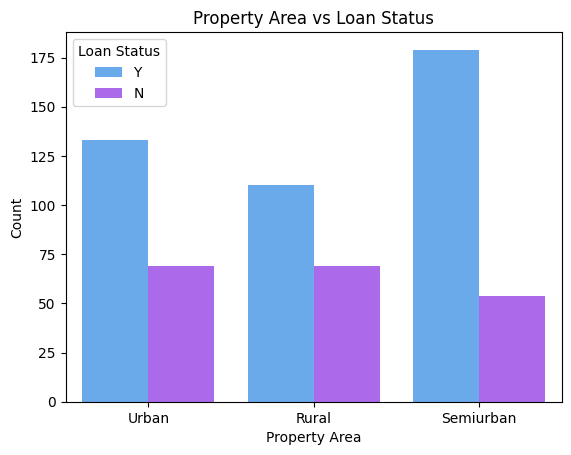

In [28]:
# Property_Area vs Loan_Status
sns.countplot(data=loan_data, x='Property_Area', hue='Loan_Status', palette='cool')
plt.title("Property Area vs Loan Status")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


Now numerical variables analysis

In [29]:
num_col = loan_data.select_dtypes(include=['int64', 'float64']).columns

In [30]:
print(num_col)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [31]:
for num in num_col:
    print(f"Unique values in {col}")
    print(loan_data[num].unique())
    print()

Unique values in Loan_Status
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  3089  4167
  9323  3707  2439  2237  8000  1820 51763  3522  5708  4344  3497  2045
  5516  6400  1916  46

In [32]:
for num in num_col:
    print(f"Value counts in {col}")
    print(loan_data[num].value_counts())
    print()

Value counts in Loan_Status
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

Value counts in Loan_Status
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

Value counts in Loan_Status
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64

Value counts in Loan_Status
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Value counts in Loan_Status
1.0    475
0.0    139
Name: Credit_History, dtype: int64



Again to detect the outliers start with boxplot

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\179898330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x=num, palette='Set2')


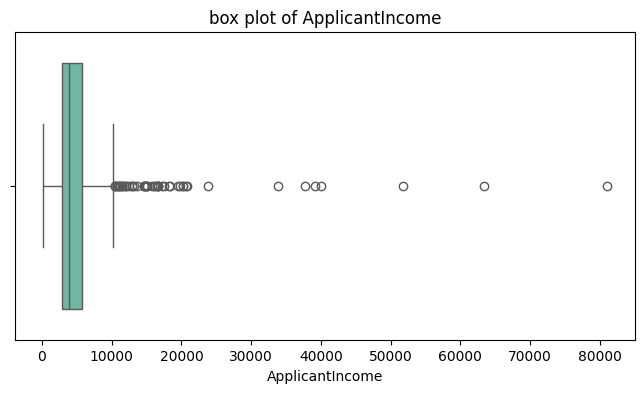

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\179898330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x=num, palette='Set2')


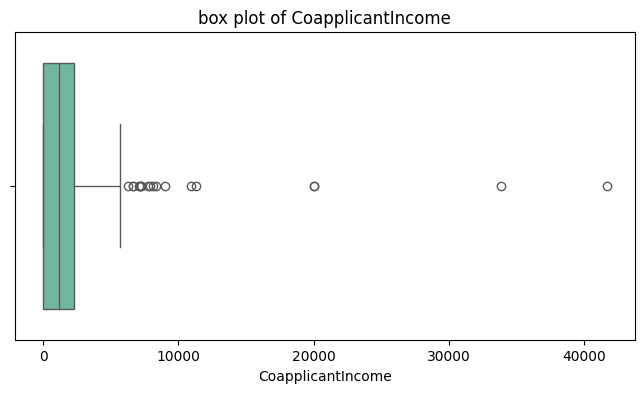

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\179898330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x=num, palette='Set2')


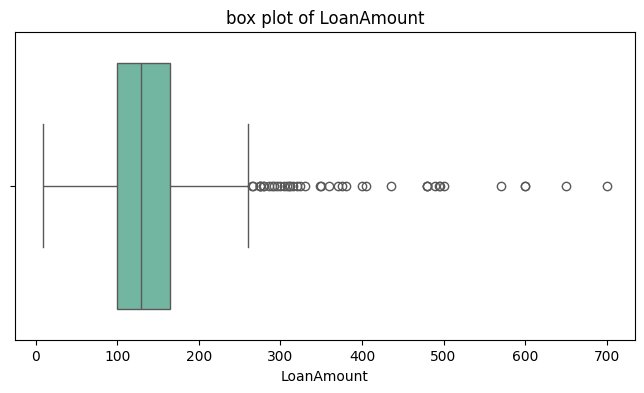

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\179898330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x=num, palette='Set2')


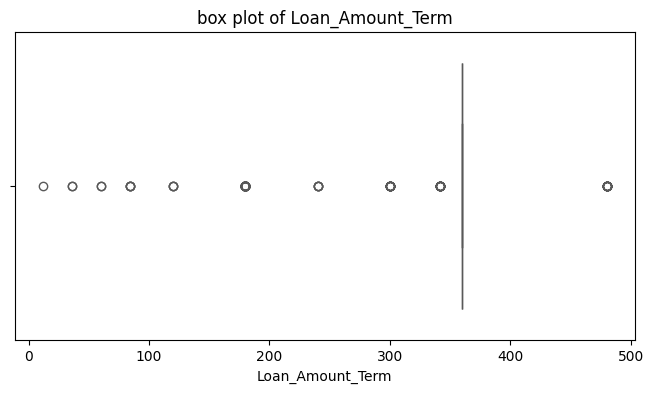

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\179898330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x=num, palette='Set2')


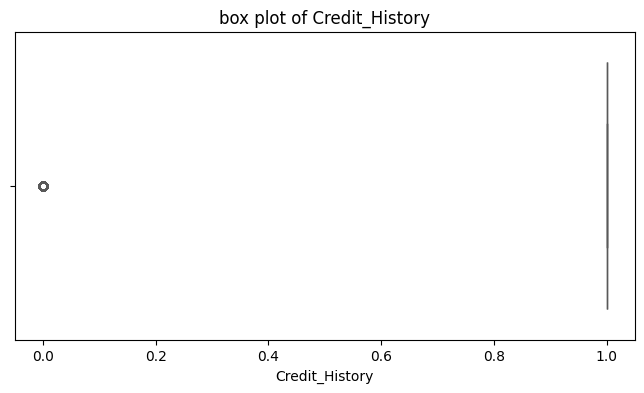

In [33]:
for num in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=loan_data, x=num, palette='Set2')
    plt.title(f"box plot of {num}")
    plt.show()

Relationships between numerical variables and target variables

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\30661879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=loan_data, x='Loan_Status', y=num, palette='pastel')
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size

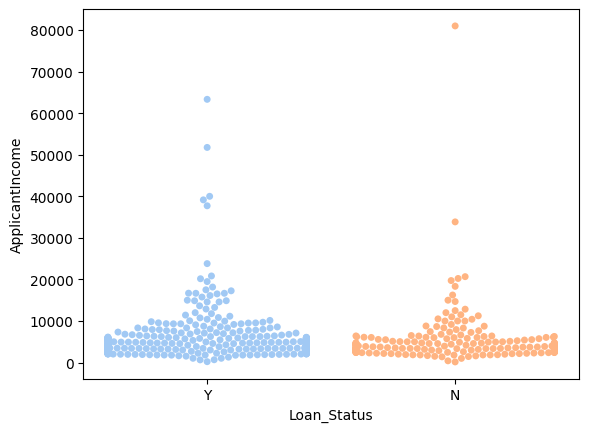

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\30661879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=loan_data, x='Loan_Status', y=num, palette='pastel')
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size

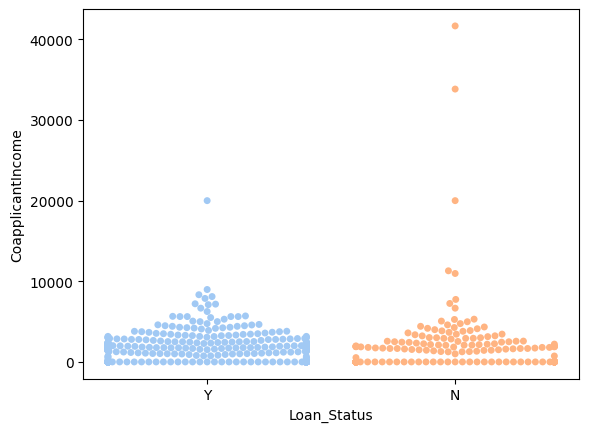

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\30661879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=loan_data, x='Loan_Status', y=num, palette='pastel')
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


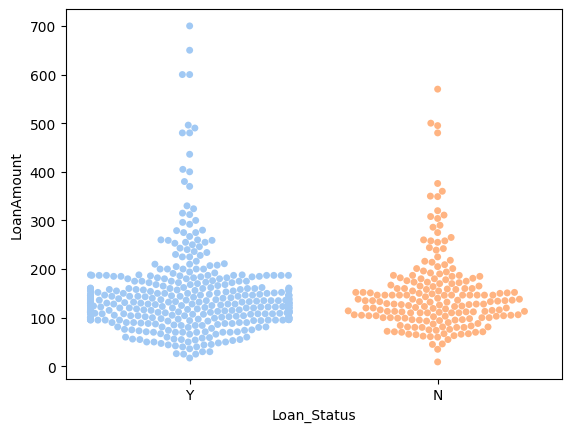

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\30661879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=loan_data, x='Loan_Status', y=num, palette='pastel')
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size

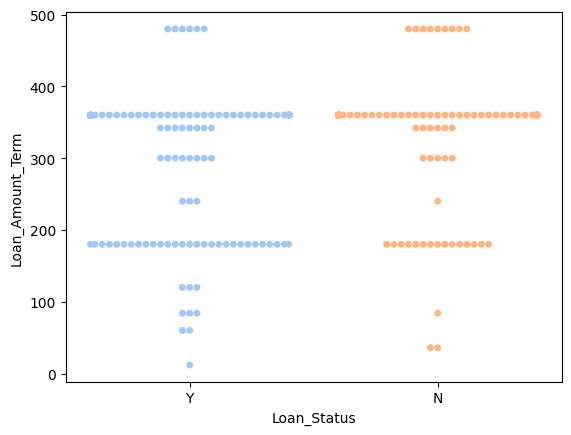

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\30661879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=loan_data, x='Loan_Status', y=num, palette='pastel')
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.2% of the points cannot be placed; you may want to decrease the size

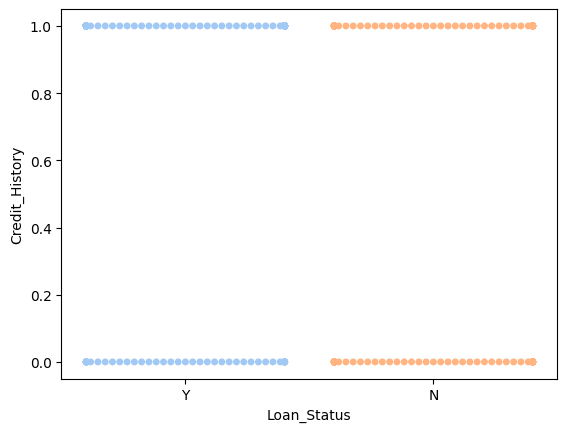

In [34]:
for num in num_col:
    sns.swarmplot(data=loan_data, x='Loan_Status', y=num, palette='pastel')
    plt.show()

Use chi-squared tests to check the relation of a particular categorical variable with target variable

In [35]:
from scipy.stats import chi2_contingency


In [36]:
significant_features = []
for col in cat_col:

    contingency_table = pd.crosstab(loan_data[col], loan_data['Loan_Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:
        significant_features.append(col)
        print(f"Chi-squared test result for {col}: p-value = {p}")
    else:
        print("not significant")

not significant
not significant
Chi-squared test result for Married: p-value = 0.04579906457828366
not significant
Chi-squared test result for Education: p-value = 0.043099621293573545
not significant
Chi-squared test result for Property_Area: p-value = 0.0021360187811644937
Chi-squared test result for Loan_Status: p-value = 1.544676456058992e-134


Married, Education, Property Area, Loan Status are the categorical variables that we will use while developing the model

Starting with handling the outliers 

Since we have not done scaling of the features so to remove the outliers we will use the IQR method (Interquartile Range)

In [37]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column}:")
    print(f"Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    print(f"Number of outliers = {len(outliers)}\n")
    return lower_bound, upper_bound

In [38]:
for col in num_col:
    detect_outliers_iqr(loan_data, col)

ApplicantIncome:
Lower Bound = -1498.75, Upper Bound = 10171.25
Number of outliers = 50

CoapplicantIncome:
Lower Bound = -3445.875, Upper Bound = 5743.125
Number of outliers = 18

LoanAmount:
Lower Bound = 3.5, Upper Bound = 261.5
Number of outliers = 41

Loan_Amount_Term:
Lower Bound = 360.0, Upper Bound = 360.0
Number of outliers = 102

Credit_History:
Lower Bound = 1.0, Upper Bound = 1.0
Number of outliers = 139



Handling the outliers by capping them, as the dataset is small so every data is important to us we cannot afford removing it    

In [39]:
lower_bound, upper_bound = detect_outliers_iqr(loan_data, 'ApplicantIncome')
loan_data['ApplicantIncome'] = loan_data['ApplicantIncome'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

ApplicantIncome:
Lower Bound = -1498.75, Upper Bound = 10171.25
Number of outliers = 50



In [40]:
lower_bound, upper_bound = detect_outliers_iqr(loan_data, 'CoapplicantIncome')
loan_data['CoapplicantIncome'] = loan_data['CoapplicantIncome'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

CoapplicantIncome:
Lower Bound = -3445.875, Upper Bound = 5743.125
Number of outliers = 18



In [41]:
lower_bound, upper_bound = detect_outliers_iqr(loan_data, 'LoanAmount')
loan_data['LoanAmount'] = loan_data['LoanAmount'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

LoanAmount:
Lower Bound = 3.5, Upper Bound = 261.5
Number of outliers = 41



Verifying whether outliers removed

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\157499409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x='ApplicantIncome', palette='Set2')


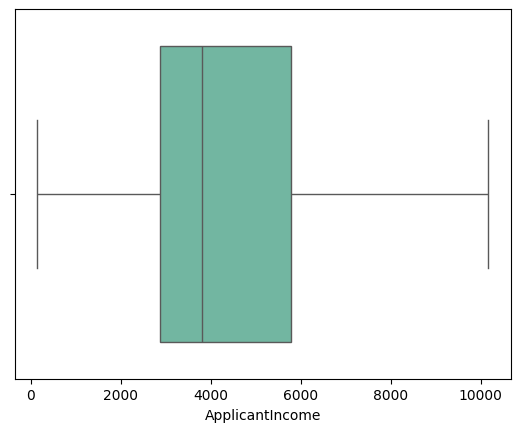

In [42]:
sns.boxplot(data=loan_data, x='ApplicantIncome', palette='Set2')
plt.show()

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\3071705992.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x='CoapplicantIncome', palette='Set2')


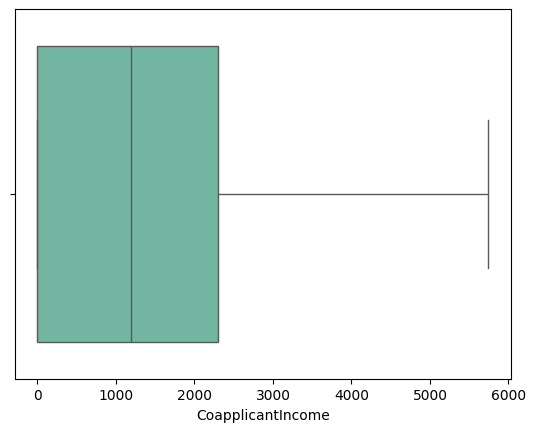

In [43]:
sns.boxplot(data=loan_data, x='CoapplicantIncome', palette='Set2')
plt.show()

C:\Users\GURPREET SINGH\AppData\Local\Temp\ipykernel_6672\2232805144.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x='LoanAmount', palette='Set2')


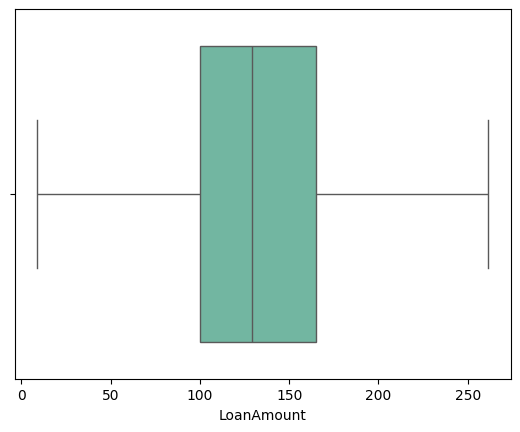

In [44]:
sns.boxplot(data=loan_data, x='LoanAmount', palette='Set2')
plt.show()

As you can see the outliers have been removed

Now we will start with feature engineering 

1. Combine ApplicantIncome and CoApplicantincome into Total Income  

In [45]:
loan_data['ApplicantIncome'] = loan_data['ApplicantIncome'] * 1000
loan_data['CoapplicantIncome'] = loan_data['CoapplicantIncome'] * 1000
loan_data['LoanAmount'] = loan_data['LoanAmount'] * 1000

In [46]:
loan_data['TotalIncome'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']

In [47]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849000.0,0.0,146412.162162,360.0,1.0,Urban,Y,5849000.0
1,LP001003,Male,Yes,1,Graduate,No,4583000.0,1508000.0,128000.000000,360.0,1.0,Rural,N,6091000.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000000.0,0.0,66000.000000,360.0,1.0,Urban,Y,3000000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583000.0,2358000.0,120000.000000,360.0,1.0,Urban,Y,4941000.0
4,LP001008,Male,No,0,Graduate,No,6000000.0,0.0,141000.000000,360.0,1.0,Urban,Y,6000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900000.0,0.0,71000.000000,360.0,1.0,Rural,Y,2900000.0
610,LP002979,Male,Yes,3+,Graduate,No,4106000.0,0.0,40000.000000,180.0,1.0,Rural,Y,4106000.0
611,LP002983,Male,Yes,1,Graduate,No,8072000.0,240000.0,253000.000000,360.0,1.0,Urban,Y,8312000.0
612,LP002984,Male,Yes,2,Graduate,No,7583000.0,0.0,187000.000000,360.0,1.0,Urban,Y,7583000.0


Risk factor

In [48]:
loan_data['Incometoloanratio'] = loan_data['TotalIncome'] / loan_data['LoanAmount']

In [49]:
loan_data['Loan_Term_Years'] = loan_data['Loan_Amount_Term'] / 12


Risk factor

In [50]:
loan_data['DebtToIncomeRatio'] = loan_data['LoanAmount'] / loan_data['TotalIncome']


In [51]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Incometoloanratio,Loan_Term_Years,DebtToIncomeRatio
0,LP001002,Male,No,0,Graduate,No,5849000.0,0.0,146412.162162,360.0,1.0,Urban,Y,5849000.0,39.948867,30.0,0.025032
1,LP001003,Male,Yes,1,Graduate,No,4583000.0,1508000.0,128000.000000,360.0,1.0,Rural,N,6091000.0,47.585938,30.0,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000000.0,0.0,66000.000000,360.0,1.0,Urban,Y,3000000.0,45.454545,30.0,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583000.0,2358000.0,120000.000000,360.0,1.0,Urban,Y,4941000.0,41.175000,30.0,0.024287
4,LP001008,Male,No,0,Graduate,No,6000000.0,0.0,141000.000000,360.0,1.0,Urban,Y,6000000.0,42.553191,30.0,0.023500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900000.0,0.0,71000.000000,360.0,1.0,Rural,Y,2900000.0,40.845070,30.0,0.024483
610,LP002979,Male,Yes,3+,Graduate,No,4106000.0,0.0,40000.000000,180.0,1.0,Rural,Y,4106000.0,102.650000,15.0,0.009742
611,LP002983,Male,Yes,1,Graduate,No,8072000.0,240000.0,253000.000000,360.0,1.0,Urban,Y,8312000.0,32.853755,30.0,0.030438
612,LP002984,Male,Yes,2,Graduate,No,7583000.0,0.0,187000.000000,360.0,1.0,Urban,Y,7583000.0,40.550802,30.0,0.024660


In [52]:
cleaned_loan_data = loan_data

In [168]:
cleaned_loan_data.to_csv("DataForDashboarding/original_data.csv")

In [53]:
important_categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']

In [54]:
loan_data = loan_data.drop(columns=['Loan_ID'], errors='ignore')  

In [55]:
print("Final Categorical Columns for Encoding:", important_categorical_columns)
print("Dataset Shape Before Encoding:", loan_data.shape)

Final Categorical Columns for Encoding: ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
Dataset Shape Before Encoding: (614, 16)


We will start encoding the categorical variables

In [56]:
from sklearn.preprocessing import LabelEncoder

# Columns for Label Encoding
ordinal_columns = ['Education', 'Dependents']

label_encoder = LabelEncoder()

# Apply Label Encoding
for col in ordinal_columns:
    loan_data[col] = label_encoder.fit_transform(loan_data[col])

print("Label Encoding Completed!")


Label Encoding Completed!


In [57]:
# Columns for One-Hot Encoding
nominal_columns = ['Gender', 'Married', 'Self_Employed', 'Property_Area']

# Apply One-Hot Encoding
loan_data = pd.get_dummies(loan_data, columns=nominal_columns, drop_first=True)

print("One-Hot Encoding Completed!")


One-Hot Encoding Completed!


Starting with model building

Split the data into train_test split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = loan_data.drop(columns=['Loan_Status'])
y = loan_data['Loan_Status']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (491, 16), Testing set: (123, 16)


In [61]:
from sklearn.preprocessing import StandardScaler


In [62]:
scaler = StandardScaler()

In [63]:
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome', 
                    'Incometoloanratio', 'DebtToIncomeRatio', 'Loan_Term_Years']
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

Training baseline models (Logistic Regression)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [65]:
log_reg = LogisticRegression()

In [66]:
log_reg.fit(X_train, y_train)

c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_pred = log_reg.predict(X_test)

In [68]:
print("accuracy_score:", accuracy_score(y_test, y_pred))

accuracy_score: 0.7479674796747967


In [69]:
print("COnfusion Matrix:\n", confusion_matrix(y_pred, y_test))

COnfusion Matrix:
 [[18  6]
 [25 74]]


In [70]:
print("classification_report:", classification_report(y_test, y_pred))

classification_report:               precision    recall  f1-score   support

           N       0.75      0.42      0.54        43
           Y       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123



Trained the baseline models like logistic regression now will work on training the trending models like XGBoost or Light GBM

Random Forest Model 

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
y_pred_rf = rf.predict(X_test)

In [73]:
print("Accuracy of the model:" , accuracy_score(y_pred_rf, y_test))

Accuracy of the model: 0.7560975609756098


In [74]:
print("Confusion Matrix:\n", confusion_matrix(y_pred_rf, y_test))

Confusion Matrix:
 [[21  8]
 [22 72]]


In [75]:
print("classification_report: ", classification_report(y_pred_rf, y_test))

classification_report:                precision    recall  f1-score   support

           N       0.49      0.72      0.58        29
           Y       0.90      0.77      0.83        94

    accuracy                           0.76       123
   macro avg       0.69      0.75      0.71       123
weighted avg       0.80      0.76      0.77       123



Now for more better results start with Gradient Boosting Models like XGBoost, LightGBM, CatBoost

Training the XGBoost Model  

In [76]:
from xgboost import XGBClassifier

In [77]:
xgb_model = XGBClassifier(random_state=42)

In [78]:
y_train_encoded = y_train.map({'N': 0, 'Y': 1})
y_test_encoded = y_test.map({'N': 0, 'Y': 1})

print(y_train_encoded.head()) 


83     0
90     1
227    1
482    1
464    0
Name: Loan_Status, dtype: int64


In [79]:
y_train_encoded

83     0
90     1
227    1
482    1
464    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 491, dtype: int64

In [80]:
xgb_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [81]:
y_pred_xgb = xgb_model.predict(X_test)

In [82]:
print("Accuracy:", accuracy_score(y_pred_xgb, y_test_encoded))

Accuracy: 0.7398373983739838


In [83]:
print("confusion_matrix:\n", confusion_matrix(y_pred_xgb, y_test_encoded))

confusion_matrix:
 [[23 12]
 [20 68]]


In [84]:
print("classification report:", classification_report(y_pred_xgb, y_test_encoded))

classification report:               precision    recall  f1-score   support

           0       0.53      0.66      0.59        35
           1       0.85      0.77      0.81        88

    accuracy                           0.74       123
   macro avg       0.69      0.71      0.70       123
weighted avg       0.76      0.74      0.75       123



Tuning the hyperparameters of XGBoost model using GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

In [87]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1, 0.3]
}

In [88]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [89]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train_encoded)

# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best Accuracy: 0.7597261708813408


c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:00:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [90]:
best_params = grid_search.best_params_
xgb_tuned = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_tuned.fit(X_train, y_train_encoded)


c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:00:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [91]:
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

In [92]:
print("Accuracy:", accuracy_score(y_pred_xgb_tuned, y_test_encoded))

Accuracy: 0.7560975609756098


In [93]:
print("confusion matrix:\n", confusion_matrix(y_pred_xgb_tuned, y_test_encoded))

confusion matrix:
 [[23 10]
 [20 70]]


In [94]:
print("classification report:", classification_report(y_pred_xgb_tuned, y_test_encoded))

classification report:               precision    recall  f1-score   support

           0       0.53      0.70      0.61        33
           1       0.88      0.78      0.82        90

    accuracy                           0.76       123
   macro avg       0.70      0.74      0.71       123
weighted avg       0.78      0.76      0.76       123



Now looking forward to LightGBM model

In [95]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [96]:
lgb_model = lgb.LGBMClassifier(random_state=42)

In [97]:
lgb_model.fit(X_train, y_train_encoded)

[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(random_state=42)

In [98]:
y_pred_lgb = lgb_model.predict(X_test)

In [99]:
print("Accuracy:", accuracy_score(y_pred_lgb, y_test_encoded))

Accuracy: 0.7560975609756098


In [100]:
print("Confusion Matrix:\n", confusion_matrix(y_pred_lgb, y_test_encoded))

Confusion Matrix:
 [[22  9]
 [21 71]]


In [101]:
print('Classification Report:', classification_report(y_pred_lgb, y_test_encoded))

Classification Report:               precision    recall  f1-score   support

           0       0.51      0.71      0.59        31
           1       0.89      0.77      0.83        92

    accuracy                           0.76       123
   macro avg       0.70      0.74      0.71       123
weighted avg       0.79      0.76      0.77       123



Now training catboost model

In [102]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [103]:
from catboost import CatBoostClassifier 

In [104]:
catboost_model = CatBoostClassifier(
    iterations=200,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate
    depth=6,  # Maximum depth of the tree
    random_seed=42,
    verbose=0  # Suppress training logs
)


In [105]:
catboost_model.fit(X_train, y_train_encoded)

In [106]:
y_pred_catboost = catboost_model.predict(X_test)

In [107]:
print("CatBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_catboost))

CatBoost Accuracy: 0.7479674796747967


In [108]:
print("COnfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_catboost))

COnfusion Matrix:
 [[21 22]
 [ 9 71]]


In [109]:
print("classification_report:", classification_report(y_test_encoded, y_pred_catboost))

classification_report:               precision    recall  f1-score   support

           0       0.70      0.49      0.58        43
           1       0.76      0.89      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.74      0.75      0.73       123



In [110]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.7, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search_catboost = GridSearchCV(
    estimator=CatBoostClassifier(random_seed=42, verbose=0),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_catboost.fit(X_train, y_train_encoded)

# Print the best parameters and best score
print("Best Parameters:", grid_search_catboost.best_params_)
print("Best Accuracy:", grid_search_catboost.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'subsample': 0.7}
Best Accuracy: 0.7740410993066985


In [111]:
best_params = grid_search_catboost.best_params_

In [112]:
cat_boost_tuned = CatBoostClassifier(**best_params, random_seed=42, verbose=0)
cat_boost_tuned.fit(X_train, y_train_encoded)

In [113]:
y_pred_catboost_tuned = cat_boost_tuned.predict(X_test)

In [114]:
print("Tune Catboost Accuracy:", accuracy_score(y_test_encoded, y_pred_catboost_tuned))

Tune Catboost Accuracy: 0.7642276422764228


In [115]:
print("Confusion matrix:\n", confusion_matrix(y_test_encoded, y_pred_catboost_tuned))

Confusion matrix:
 [[24 19]
 [10 70]]


In [116]:
print("Classification Report:", classification_report(y_test_encoded, y_pred_catboost_tuned))

Classification Report:               precision    recall  f1-score   support

           0       0.71      0.56      0.62        43
           1       0.79      0.88      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.72      0.73       123
weighted avg       0.76      0.76      0.76       123



Done with gradient boosting models now lets see some depe learning models

In [117]:
pip install pytorch-tabnet


Note: you may need to restart the kernel to use updated packages.


In [118]:
from pytorch_tabnet.tab_model import TabNetClassifier


In [119]:
tabnet_model = TabNetClassifier(
    n_d = 8,
    n_a = 8,
    n_steps = 5,
    gamma = 1.5,
    lambda_sparse=1e-3,
    seed = 42
)

c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


TabNet works with numpy arrays so lets convert our data to numpy arrays

In [120]:
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values


In [121]:
tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=10,  
    batch_size=256,
    virtual_batch_size=128
)

epoch 0  | loss: 1.44066 | val_accuracy: 0.35772 |  0:00:00s
epoch 1  | loss: 1.03139 | val_accuracy: 0.54472 |  0:00:00s
epoch 2  | loss: 0.72862 | val_accuracy: 0.64228 |  0:00:00s
epoch 3  | loss: 0.70056 | val_accuracy: 0.71545 |  0:00:00s
epoch 4  | loss: 0.72542 | val_accuracy: 0.56098 |  0:00:00s
epoch 5  | loss: 0.70167 | val_accuracy: 0.53659 |  0:00:00s
epoch 6  | loss: 0.65706 | val_accuracy: 0.61789 |  0:00:00s
epoch 7  | loss: 0.60749 | val_accuracy: 0.64228 |  0:00:00s
epoch 8  | loss: 0.58396 | val_accuracy: 0.66667 |  0:00:00s
epoch 9  | loss: 0.59296 | val_accuracy: 0.69919 |  0:00:01s
epoch 10 | loss: 0.6226  | val_accuracy: 0.64228 |  0:00:01s
epoch 11 | loss: 0.64639 | val_accuracy: 0.5935  |  0:00:01s
epoch 12 | loss: 0.6298  | val_accuracy: 0.56098 |  0:00:01s
epoch 13 | loss: 0.61401 | val_accuracy: 0.54472 |  0:00:01s

Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_accuracy = 0.71545


c:\Users\GURPREET SINGH\anaconda3\envs\azackme\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Tabnet is struggling because the dataset is small. We will now try Feedforward Neural Network

Now visualizing the model f1-scores

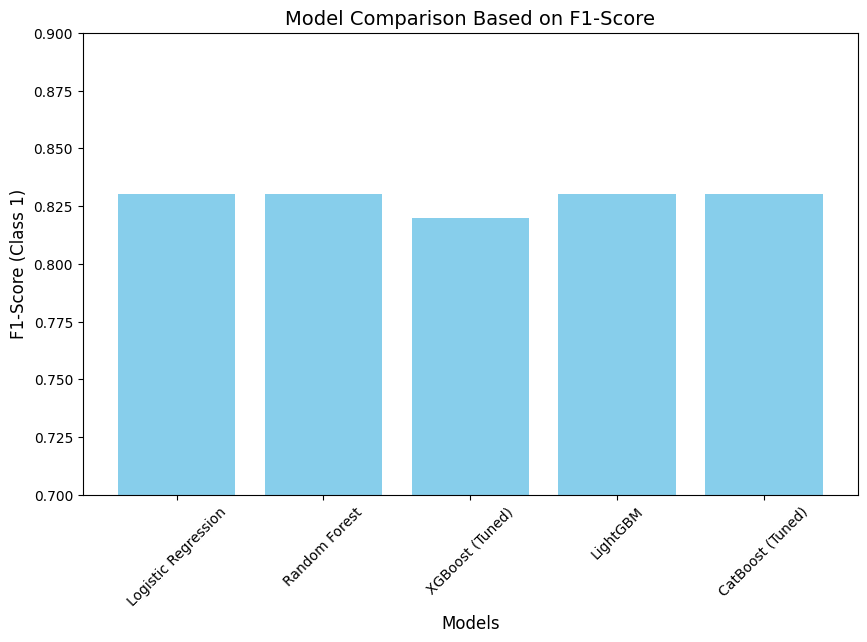

In [122]:
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'Random Forest', 'XGBoost (Tuned)', 'LightGBM', 'CatBoost (Tuned)']
f1_scores = [0.83, 0.83, 0.82, 0.83, 0.83]  # Replace with your actual F1-scores

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1-Score (Class 1)', fontsize=12)
plt.title('Model Comparison Based on F1-Score', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0.7, 0.9)
plt.show()


Model Comparison based on recall    

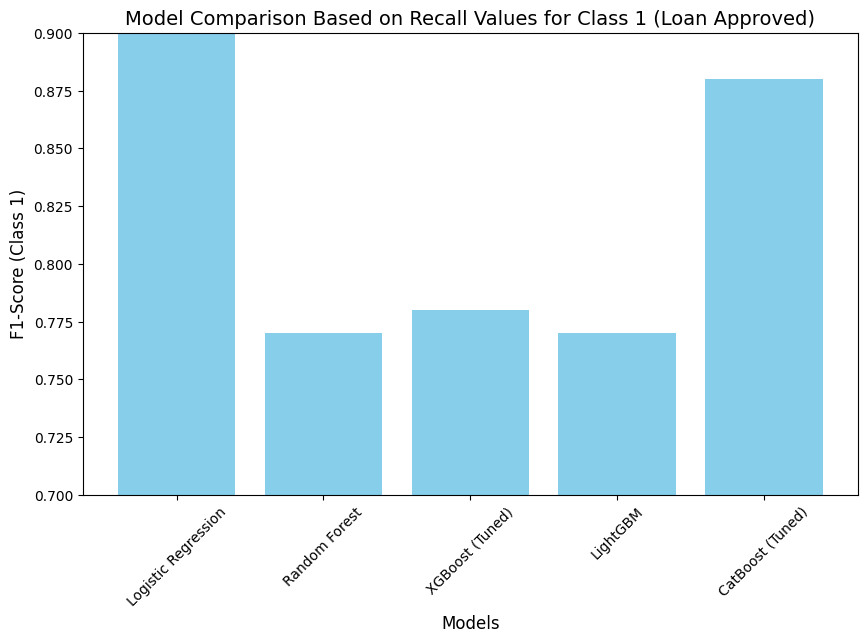

In [123]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost (Tuned)', 'LightGBM', 'CatBoost (Tuned)']
recall = [0.93, 0.77, 0.78, 0.77, 0.88]  # Replace with your actual F1-scores

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, recall, color='skyblue')
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1-Score (Class 1)', fontsize=12)
plt.title('Model Comparison Based on Recall Values for Class 1 (Loan Approved)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0.7, 0.9)
plt.show()

Model comparison based on Accuracy

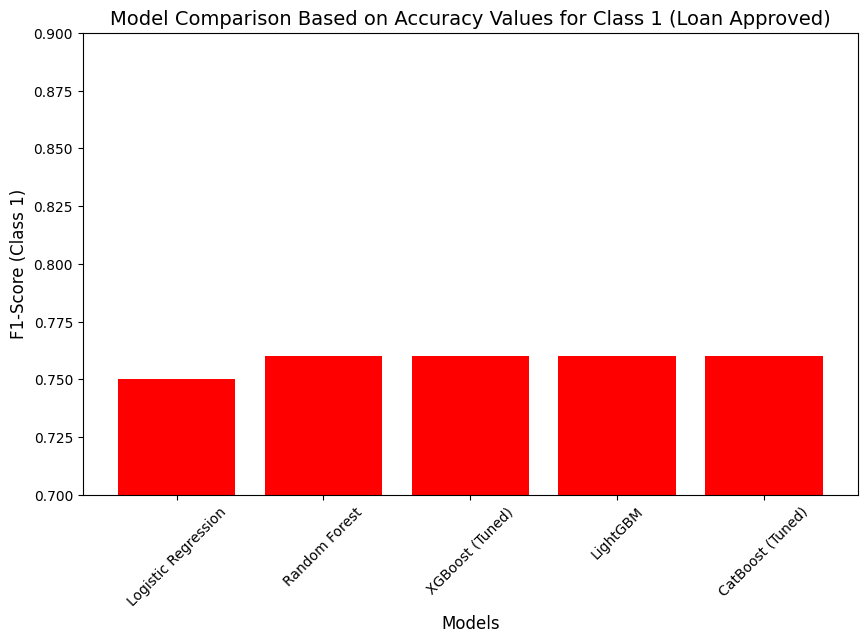

In [124]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost (Tuned)', 'LightGBM', 'CatBoost (Tuned)']
Accuracy = [0.75, 0.76, 0.76, 0.76, 0.76]  # Replace with your actual F1-scores

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, Accuracy, color='red')
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1-Score (Class 1)', fontsize=12)
plt.title('Model Comparison Based on Accuracy Values for Class 1 (Loan Approved)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0.7, 0.9)
plt.show()

Plotting the roc_auc curve

In [125]:
from sklearn.metrics import roc_curve, auc

In [126]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Logistic Regression

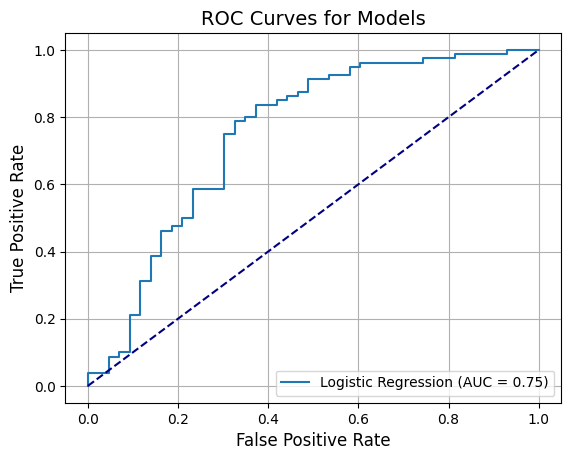

In [127]:
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_encoded, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Models', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

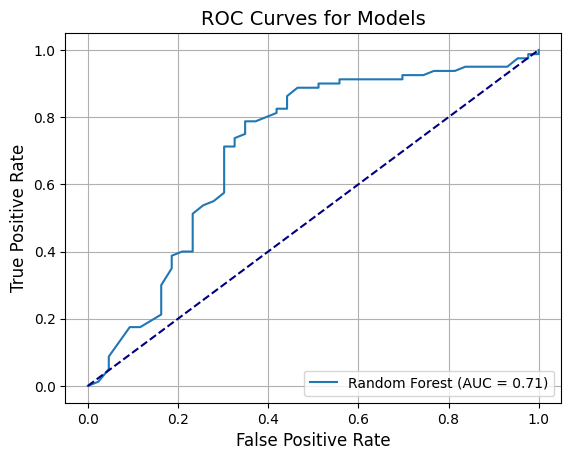

In [128]:
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Models', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()


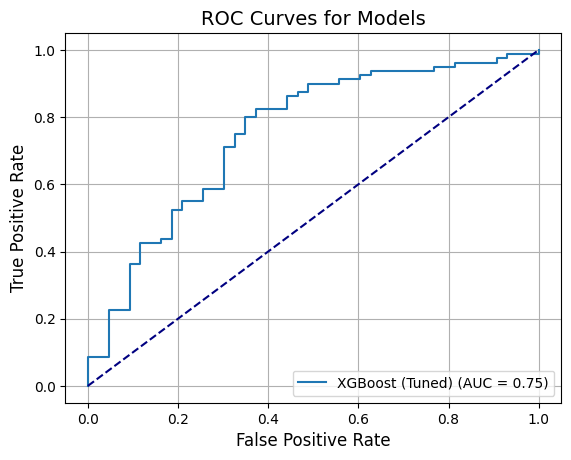

In [129]:
y_pred_proba_xgb = xgb_tuned.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_encoded, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (Tuned) (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Models', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

Feature Importance

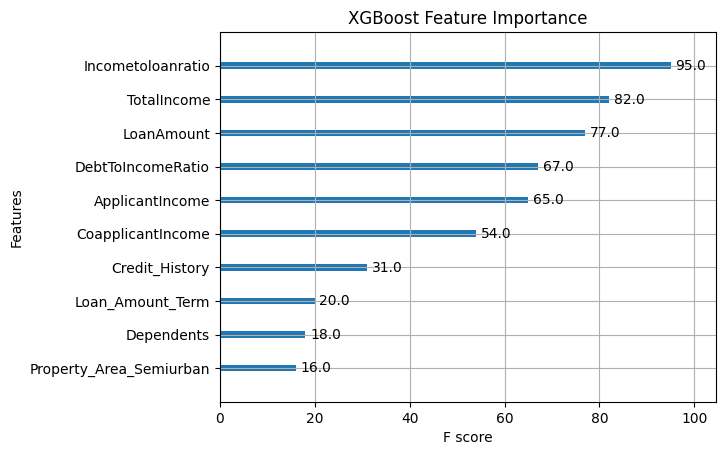

In [165]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(xgb_tuned, importance_type="weight", max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.show()


                 Feature Id  Importances
0           ApplicantIncome    14.621826
1            Credit_History    13.678570
2                LoanAmount    12.452728
3               TotalIncome    10.031498
4         DebtToIncomeRatio     8.866502
5         Incometoloanratio     7.391346
6         CoapplicantIncome     6.940852
7                Dependents     6.443765
8   Property_Area_Semiurban     4.912470
9               Gender_Male     2.430999
10                Education     2.237084
11          Loan_Term_Years     2.234875
12              Married_Yes     2.220854
13         Loan_Amount_Term     1.980626
14      Property_Area_Urban     1.902846
15        Self_Employed_Yes     1.653158


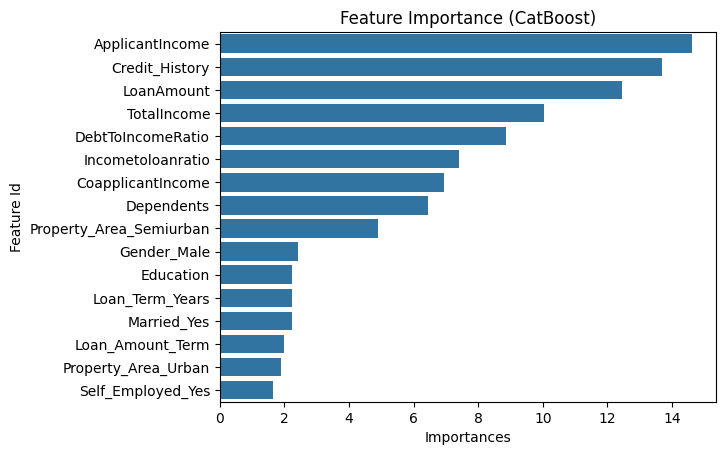

In [130]:
feature_importance = cat_boost_tuned.get_feature_importance(prettified=True)
print(feature_importance)

# Visualize
import seaborn as sns
sns.barplot(x=feature_importance["Importances"], y=feature_importance["Feature Id"])
plt.title("Feature Importance (CatBoost)")
plt.show()


Save the model

In [131]:
import joblib
import os

# Create a directory to save models and pipelines if it doesn't exist
os.makedirs("saved_models", exist_ok=True)


Creating preprocessor

In [132]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib


In [133]:
numerical_columns = [
    'ApplicantIncome', 
    'CoapplicantIncome', 
    'LoanAmount', 
    'Loan_Amount_Term', 
    'TotalIncome', 
    'Incometoloanratio', 
    'Loan_Term_Years', 
    'DebtToIncomeRatio'
]

In [134]:
categorical_columns = [
    'Dependents', 
    'Education', 
    'Gender_Male', 
    'Married_Yes', 
    'Self_Employed_Yes', 
    'Property_Area_Semiurban', 
    'Property_Area_Urban'
]

In [135]:
numerical_transformer = StandardScaler()  # Scale numerical features
categorical_transformer = 'passthrough'  # Categorical features are already encoded

In [157]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    remainder='passthrough',  # Keep remaining columns as is
    verbose_feature_names_out=False  # Disable prefixes
)

In [158]:
preprocessor.fit(X_train)
joblib.dump(preprocessor, "saved_models/preprocessor.pkl")
print("Preprocessing pipeline saved.")

Preprocessing pipeline saved.


In [138]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [139]:
print("Preprocessing completed!")

Preprocessing completed!


In [140]:
joblib.dump(rf, "saved_models/random_forest_model.pkl")
print("Random Forest model saved successfully.")

Random Forest model saved successfully.


In [141]:
joblib.dump(xgb_tuned, "saved_models/xgboost_model.pkl")
print("XGBoost model saved successfully.")

XGBoost model saved successfully.


In [142]:
joblib.dump(lgb_model, "saved_models/lightgbm_model.pkl")
print("LightGBM model saved successfully.")

LightGBM model saved successfully.


In [143]:
joblib.dump(cat_boost_tuned, "saved_models/catboost_model.pkl")
print("CatBoost model saved successfully.")

CatBoost model saved successfully.


Developing the API

In [144]:
pip install flask


Note: you may need to restart the kernel to use updated packages.


In [159]:
print(preprocessor.get_feature_names_out())


['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'TotalIncome' 'Incometoloanratio' 'Loan_Term_Years' 'DebtToIncomeRatio'
 'Dependents' 'Education' 'Gender_Male' 'Married_Yes' 'Self_Employed_Yes'
 'Property_Area_Semiurban' 'Property_Area_Urban' 'Credit_History']


In [145]:
from flask import Flask, request, jsonify
import joblib

Code for the API

In [146]:
pip install nest_asyncio


Note: you may need to restart the kernel to use updated packages.


In [147]:
import nest_asyncio
nest_asyncio.apply()


In [185]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Initialize Flask app
app = Flask(__name__)

# Load the saved model and preprocessor
model = joblib.load("saved_models/xgboost_model.pkl")
preprocessor = joblib.load("saved_models/preprocessor.pkl")

# Define the home route
@app.route("/", methods=["GET"])
def home():
    return "Loan Approval Prediction API is running!"

# Define the prediction route
@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get JSON data from the request
        data = request.get_json()

        # Validate input
        required_columns = [
            "ApplicantIncome", "CoapplicantIncome", "LoanAmount",
            "Loan_Amount_Term", "TotalIncome", "Incometoloanratio",
            "Loan_Term_Years", "DebtToIncomeRatio", "Dependents",
            "Education", "Gender_Male", "Married_Yes",
            "Self_Employed_Yes", "Property_Area_Semiurban",
            "Property_Area_Urban", "Credit_History"
        ]
        for col in required_columns:
            if col not in data:
                return jsonify({
                    "error": f"Missing required column: {col}",
                    "message": "Please provide all required input fields."
                }), 400

        # Convert JSON to DataFrame for preprocessing
        input_data = pd.DataFrame([data])

        # Manually encode raw categorical values, if needed
        if "Education" in input_data.columns:
            input_data["Education"] = input_data["Education"].replace({
                "Graduate": 1,
                "Not Graduate": 0
            })
        if "Dependents" in input_data.columns:
            input_data["Dependents"] = input_data["Dependents"].replace({
                "0": 0, "1": 1, "2": 2, "3+": 3
            })

        # Preprocess the input data
        input_data_transformed = preprocessor.transform(input_data)

        # Predict probabilities and final output
        prediction_proba = model.predict_proba(input_data_transformed)[:, 1]
        prediction = model.predict(input_data_transformed)

        # Convert prediction to human-readable format
        prediction_label = "Approved" if prediction[0] == 1 else "Not Approved"

        # Return the prediction and probability
        return jsonify({
            "prediction": prediction_label,
            "probability": float(prediction_proba[0])
        })
    except Exception as e:
        app.logger.error(f"Error processing input: {e}")
        return jsonify({
            "error": str(e),
            "message": "There was an issue processing your request."
        }), 400

# Run the Flask app
if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
[2025-01-13 19:58:29,776] ERROR in 894362960: Error processing input: 400 Bad Request: Failed to decode JSON object: Extra data: line 19 column 1 (char 456)
127.0.0.1 - - [13/Jan/2025 19:58:29] "POST /predict HTTP/1.1" 400 -
[2025-01-13 19:58:46,665] ERROR in 894362960: Error processing input: 415 Unsupported Media Type: Did not attempt to load JSON data because the request Content-Type was not 'application/json'.
127.0.0.1 - - [13/Jan/2025 19:58:46] "POST /predict HTTP/1.1" 400 -
127.0.0.1 - - [13/Jan/2025 19:59:04] "POST /predict HTTP/1.1" 200 -
[2025-01-13 19:59:16,508] ERROR in 894362960: Error processing input: 415 Unsupported Media Type: Did not attempt to load JSON data because the request Content-Type was not 'application/json'.
127.0.0.1 - - [13/Jan/2025 19:59:16] "POST /predict HTTP/1.1" 400 -
127.0.0.1 - - [13/Jan/2025 19:59:53] "POST /predict HTTP/1.1" 200 -


Saving the model data

In [170]:
# For XGBoost or Random Forest
feature_importance = xgb_tuned.feature_importances_  # or rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Save to CSV
feature_importance_df.to_csv("ModelData/feature_importance.csv", index=False)


In [171]:
# For Random Forest
feature_importance = rf.feature_importances_
features = X_train.columns

# Create a DataFrame
rf_feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Save to CSV
rf_feature_importance_df.to_csv("ModelData/rf_feature_importance.csv", index=False)


In [172]:
# For CatBoost
feature_importance = cat_boost_tuned.get_feature_importance()
features = X_train.columns

# Create a DataFrame
catboost_feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Save to CSV
catboost_feature_importance_df.to_csv("ModelData/catboost_feature_importance.csv", index=False)


In [173]:
# For LightGBM
feature_importance = lgb_model.feature_importances_
features = X_train.columns

# Create a DataFrame
lgb_feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Save to CSV
lgb_feature_importance_df.to_csv("ModelData/lgb_feature_importance.csv", index=False)


In [175]:
# For XGBoost
y_pred_xgb = xgb_tuned.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test_encoded, y_pred_xgb).ravel()

xgb_confusion_data = pd.DataFrame({
    "Metric": ["True Negatives", "False Positives", "False Negatives", "True Positives"],
    "Count": [tn, fp, fn, tp]
})

# Save to CSV
xgb_confusion_data.to_csv("ModelData/xgb_confusion_matrix.csv", index=False)


In [176]:
# For Random Forest
y_pred_rf = rf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()

rf_confusion_data = pd.DataFrame({
    "Metric": ["True Negatives", "False Positives", "False Negatives", "True Positives"],
    "Count": [tn, fp, fn, tp]
})

# Save to CSV
rf_confusion_data.to_csv("ModelData/rf_confusion_matrix.csv", index=False)


In [178]:
# For CatBoost
y_pred_catboost = catboost_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test_encoded, y_pred_catboost).ravel()

catboost_confusion_data = pd.DataFrame({
    "Metric": ["True Negatives", "False Positives", "False Negatives", "True Positives"],
    "Count": [tn, fp, fn, tp]
})

# Save to CSV
catboost_confusion_data.to_csv("ModelData/catboost_confusion_matrix.csv", index=False)


In [180]:
# For LightGBM
y_pred_lgb = lgb_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test_encoded, y_pred_lgb).ravel()

lgb_confusion_data = pd.DataFrame({
    "Metric": ["True Negatives", "False Positives", "False Negatives", "True Positives"],
    "Count": [tn, fp, fn, tp]
})

# Save to CSV
lgb_confusion_data.to_csv("ModelData/lgb_confusion_matrix.csv", index=False)


In [181]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
y_pred_xgb = xgb_tuned.predict(X_test)
y_pred_proba_xgb = xgb_tuned.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
precision = precision_score(y_test_encoded, y_pred_xgb)
recall = recall_score(y_test_encoded, y_pred_xgb)
f1 = f1_score(y_test_encoded, y_pred_xgb)
auc = roc_auc_score(y_test_encoded, y_pred_proba_xgb)

# DataFrame
xgb_performance_data = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
})

# Save to CSV
xgb_performance_data.to_csv("ModelData/xgb_performance_metrics.csv", index=False)
